# PANDAS BÁSICO

## IMPORTANDO AS BIBLIOTECAS

In [ ]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#para trabalhar
dados = pd.read_csv('/content/dataset_desafio_2.csv')

In [ ]:
#visualizar
dados.head(1)

,MATRICULA,NOME,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS,PERFIL
0,502375,Márcia Illiglener,0,0,0,0,6.2,5.8,4.6,5.9,0.0,2,4,3,EXATAS


In [ ]:
GO_na = dados.loc[dados['NOTA_GO'].isna()]

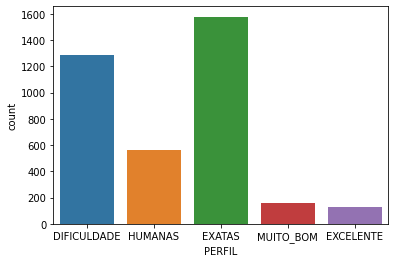

In [ ]:
sns.countplot(GO_na['PERFIL'])

In [ ]:
dados.columns

Index(['MATRICULA', 'NOME', 'REPROVACOES_DE', 'REPROVACOES_EM',
       'REPROVACOES_MF', 'REPROVACOES_GO', 'NOTA_DE', 'NOTA_EM', 'NOTA_MF',
       'NOTA_GO', 'INGLES', 'H_AULA_PRES', 'TAREFAS_ONLINE', 'FALTAS',
       'PERFIL'],
      dtype='object')

In [ ]:
dados.drop(['MATRICULA', 'NOME'],axis=1, inplace=True)

In [ ]:
dados.head(1)

,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS,PERFIL
0,0,0,0,0,6.2,5.8,4.6,5.9,0.0,2,4,3,EXATAS


In [ ]:
#substituindo os nulos pela mediana das notas
dados.fillna(0, inplace=True)

In [ ]:
X = dados[['NOTA_DE', 'NOTA_EM', 'NOTA_MF',
       'NOTA_GO']]
y = dados['PERFIL']

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
#standard
std = StandardScaler()
mms = MinMaxScaler()
rs = RobustScaler()

In [ ]:
x_std = std.fit_transform(X)
x_mms = mms.fit_transform(X)
x_rs = rs.fit_transform(X)

In [ ]:
x_std

array([[ 0.39779872,  0.28516382, -0.07958074,  0.76949735],
       [ 0.31851172,  0.4436509 ,  0.1398212 ,  0.28166544],
       [ 0.83387719,  0.64175975,  0.83459399,  1.22248413],
       ...,
       [ 1.07173818,  0.99835567,  1.27339786,  1.22248413],
       [ 0.43744221,  0.00781143, -1.76166224, -1.28636572],
       [ 0.7149467 ,  0.87949037, -1.76166224, -1.28636572]])

In [ ]:
x_mms

array([[0.68888889, 0.61702128, 0.4       , 0.59      ],
       [0.66666667, 0.65957447, 0.45217391, 0.45      ],
       [0.81111111, 0.71276596, 0.6173913 , 0.72      ],
       ...,
       [0.87777778, 0.80851064, 0.72173913, 0.72      ],
       [0.7       , 0.54255319, 0.        , 0.        ],
       [0.77777778, 0.77659574, 0.        , 0.        ]])

In [ ]:
x_rs

array([[ 0.        , -0.05555556, -0.5       ,  0.15      ],
       [-0.13333333,  0.16666667, -0.16666667, -0.08333333],
       [ 0.73333333,  0.44444444,  0.88888889,  0.36666667],
       ...,
       [ 1.13333333,  0.94444444,  1.55555556,  0.36666667],
       [ 0.06666667, -0.44444444, -3.05555556, -0.83333333],
       [ 0.53333333,  0.77777778, -3.05555556, -0.83333333]])

In [ ]:
#dividindo os dados
from sklearn.model_selection import train_test_split

In [ ]:
Xbase_train, Xbase_test, ybase_train, ybase_test = train_test_split(X,y)

In [ ]:
Xstd_train, Xstd_test, ystd_train, ystd_test = train_test_split(x_std,y)

In [ ]:
Xmms_train, Xmms_test, ymms_train, ymms_test = train_test_split(x_mms,y)

In [ ]:
Xrs_train, Xrs_test, yrs_train, yrs_test = train_test_split(x_rs,y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
svc = SVC()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
modelo1 = rf.fit(Xbase_train, ybase_train)

In [ ]:
ybase_pred = modelo1.predict(Xbase_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
accuracy_score(ybase_test,ybase_pred)

0.7902

In [ ]:
print(classification_report(ybase_test,ybase_pred))

              precision    recall  f1-score   support

 DIFICULDADE       0.85      0.73      0.79      1754
      EXATAS       0.80      0.89      0.84      2067
   EXCELENTE       0.62      0.58      0.60       174
     HUMANAS       0.76      0.90      0.82       782
   MUITO_BOM       0.24      0.11      0.15       223

    accuracy                           0.79      5000
   macro avg       0.66      0.64      0.64      5000
weighted avg       0.78      0.79      0.78      5000



In [ ]:
modelo2 = rf.fit(Xstd_train, ystd_train)

In [ ]:
ystd_pred = modelo2.predict(Xstd_test)

In [ ]:
#valor a bater 0.792
accuracy_score(ystd_test,ystd_pred)

0.79

In [ ]:
print(classification_report(ystd_test,ystd_pred))

              precision    recall  f1-score   support

 DIFICULDADE       0.85      0.74      0.79      1737
      EXATAS       0.80      0.89      0.84      2077
   EXCELENTE       0.62      0.60      0.61       177
     HUMANAS       0.75      0.89      0.81       770
   MUITO_BOM       0.31      0.13      0.18       239

    accuracy                           0.79      5000
   macro avg       0.67      0.65      0.65      5000
weighted avg       0.78      0.79      0.78      5000



In [ ]:
modelo3 = rf.fit(Xmms_train,ymms_train)

In [ ]:
ymms_pred = modelo3.predict(Xmms_test)

In [ ]:
#valor a bater 0.792(median) - melhorou para 0.8006 com o na =0
accuracy_score(ymms_test,ymms_pred)

0.8006

In [ ]:
print(classification_report(ymms_test,ymms_pred))

              precision    recall  f1-score   support

 DIFICULDADE       0.85      0.76      0.81      1754
      EXATAS       0.81      0.88      0.85      2072
   EXCELENTE       0.59      0.56      0.58       177
     HUMANAS       0.77      0.89      0.83       790
   MUITO_BOM       0.29      0.14      0.19       207

    accuracy                           0.80      5000
   macro avg       0.66      0.65      0.65      5000
weighted avg       0.79      0.80      0.79      5000



In [ ]:
modelo4 = rf.fit(Xrs_train, yrs_train)

In [ ]:
yrs_pred = modelo4.predict(Xrs_test)

In [ ]:
#valor a bater = 0.8028
accuracy_score(yrs_test,yrs_pred)

0.7948

In [ ]:
print(classification_report(yrs_test,yrs_pred))

              precision    recall  f1-score   support

 DIFICULDADE       0.85      0.75      0.80      1729
      EXATAS       0.81      0.89      0.85      2095
   EXCELENTE       0.62      0.56      0.59       175
     HUMANAS       0.75      0.92      0.82       769
   MUITO_BOM       0.28      0.11      0.16       232

    accuracy                           0.79      5000
   macro avg       0.66      0.64      0.64      5000
weighted avg       0.78      0.79      0.78      5000



In [ ]:
#mudando o classificador
modelo5 = svc.fit(Xbase_train, ybase_train)
modelo6 = svc.fit(Xstd_train, ystd_train)
modelo7 = svc.fit(Xmms_train, ymms_train)
modelo8 = svc.fit(Xrs_train, yrs_train)

In [ ]:
y_base_svc = modelo5.predict(Xbase_test)
y_std_svc = modelo6.predict(Xstd_test)
y_mms_svc = modelo7.predict(Xmms_test)
y_rs_svc = modelo8.predict(Xrs_test)

In [ ]:
#melhor valor 0.81 sem class_weight e nan pela mediana
accuracy_score(ybase_test, y_base_svc), accuracy_score(ystd_test, y_std_svc), accuracy_score(ymms_test, y_mms_svc), accuracy_score(yrs_test, y_rs_svc)

(0.1764, 0.7768, 0.532, 0.8048)

In [ ]:
X= dados.drop(['PERFIL'], axis=1)
Y= dados['PERFIL']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y)

In [ ]:
RF = rf.fit(x_train,y_train)

In [ ]:
SVC = SVC.fit(x_train, y_train)

In [ ]:
y_pred_rf = RF.predict(x_test)

In [ ]:
y_pred_svc = SVC.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_rf)

0.8012

In [ ]:
accuracy_score(y_test,y_pred_svc)

0.784

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

 DIFICULDADE       0.88      0.72      0.80      1786
      EXATAS       0.79      0.91      0.85      2033
   EXCELENTE       0.70      0.66      0.68       158
     HUMANAS       0.75      0.93      0.83       790
   MUITO_BOM       0.28      0.07      0.11       233

    accuracy                           0.80      5000
   macro avg       0.68      0.66      0.65      5000
weighted avg       0.79      0.80      0.79      5000



In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(ratio='minority')

In [ ]:
x_smote,y_smote = smote.fit_resample(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
modelo_smote = SVC.fit(x_smote,y_smote)

In [ ]:
y_pred_smote = modelo_smote.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_smote)

0.756

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
RF_random = RandomizedSearchCV(estimator = RF, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
RF_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 47.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
RF_random.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1600,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1600,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [ ]:
RF_random.best_score_

0.8148666666666666

In [ ]:
modelo = rf.fit(x_train, y_train)

In [ ]:
predict = rf.predict(x_test)

In [ ]:
accuracy_score(y_test, predict)

0.803

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

 DIFICULDADE       0.90      0.73      0.81      1786
      EXATAS       0.80      0.91      0.85      2033
   EXCELENTE       0.60      0.78      0.68       158
     HUMANAS       0.79      0.86      0.83       790
   MUITO_BOM       0.30      0.19      0.24       233

    accuracy                           0.80      5000
   macro avg       0.68      0.70      0.68      5000
weighted avg       0.80      0.80      0.80      5000



In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
dummy = DummyClassifier()

In [ ]:
dummy.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


DummyClassifier(constant=None, random_state=None, strategy='warn')

In [ ]:
pred = dummy.predict(x_test)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

 DIFICULDADE       0.34      0.33      0.34      1786
      EXATAS       0.40      0.40      0.40      2033
   EXCELENTE       0.04      0.04      0.04       158
     HUMANAS       0.15      0.15      0.15       790
   MUITO_BOM       0.04      0.04      0.04       233

    accuracy                           0.31      5000
   macro avg       0.19      0.19      0.19      5000
weighted avg       0.31      0.31      0.31      5000



In [ ]:
accuracy_score(y_test, pred)

0.3096

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=100, nthread=1, subsample=0.9000000000000001)

In [ ]:
modelo2 = xgb.fit(x_train,y_train)

In [ ]:
pred = xgb.predict(x_test)

In [ ]:
accuracy_score(y_test, pred)

0.8118

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

 DIFICULDADE       0.91      0.72      0.80      1786
      EXATAS       0.79      0.93      0.86      2033
   EXCELENTE       0.68      0.70      0.69       158
     HUMANAS       0.75      0.96      0.84       790
   MUITO_BOM       0.36      0.05      0.09       233

    accuracy                           0.81      5000
   macro avg       0.70      0.67      0.66      5000
weighted avg       0.80      0.81      0.79      5000



In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import model_selection

num_trees = 100

kfold = model_selection.StratifiedKFold(n_splits=10)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=42)
results = model_selection.cross_val_score(model, X, y.values.ravel(), cv=kfold)
print("kafulds")
print("Acurácia GBC: {}%".format(round(results.mean()*100, 2)))

kafulds
Acurácia GBC: 81.07%
